<a href="https://colab.research.google.com/github/ishantinsights/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Business Problem: Cloud kitchen wants to optimize marketing efforts and improve customer retention by segmenting customers to run targeted marketing campaigns

Dataset- 375K transactions




In [1]:
# Import the pandas library for data manipulation and analysis
import pandas as pd
# Import the numpy library for numerical operations
import numpy as np
# Import the matplotlib library for creating static visualizations
import matplotlib.pyplot as plt
# Import the seaborn library for making statistical graphics
import seaborn as sb



In [2]:
!pip install squarify

In [3]:
retail=pd.read_csv("/content/retail.csv")

First we will cvalculate the monetary value of each customer

In [4]:
retail.shape

(375187, 8)

In [5]:
retail.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,375187.000000,375187.000000,375187.000000,375187.000000
mean,560720.262192,13.584978,2.318388,15306.779446
std,13104.443738,184.647865,1.825628,1710.647733
min,536365.000000,1.000000,0.001000,12346.000000
25%,549291.000000,2.000000,1.060000,13975.000000
50%,562031.000000,6.000000,1.650000,15187.000000
75%,572194.000000,12.000000,2.950000,16808.000000
max,581587.000000,80995.000000,8.290000,18287.000000


In [8]:
retail.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

No missing values

In [12]:
retail['CustomerID'].nunique()

4311

No of unique customers are 4311

In [13]:
retail['InvoiceNo'].nunique()

18224

No of unique orders are 18K

In [14]:
retail['Country'].value_counts()

Country
United Kingdom          335523
Germany                   8185
France                    7636
EIRE                      6544
Spain                     2232
Netherlands               2218
Belgium                   1770
Switzerland               1709
Portugal                  1376
Australia                 1137
Norway                     962
Italy                      667
Channel Islands            651
Finland                    607
Cyprus                     544
Sweden                     423
Austria                    363
Denmark                    357
Japan                      315
Poland                     284
Israel                     230
Unspecified                224
Singapore                  206
Iceland                    176
USA                        175
Canada                     139
Greece                     131
Malta                       95
United Arab Emirates        63
European Community          51
RSA                         48
Lithuania                   35


Most of the orders are from United Kingdom followed by Germany and France

# **Calculating Monetary Value**

In [ ]:
retail["Monetary"]=retail['UnitPrice']*retail['Quantity']


In [ ]:
# Create a new column 'Monetary' in the retail DataFrame
# 'Monetary' is calculated by multiplying the 'UnitPrice' and 'Quantity' columns
# first calculating the monetary value of each customer , how much customer has contributed in monetary terms till date
monetary=retail.groupby('CustomerID')['Monetary'].sum().reset_index()
monetary['Total_amount']=np.round(monetary['Monetary'],0)
monetary.drop('Monetary',axis=1,inplace=True) # drop the repetitive columns


In [ ]:
# Convert the 'InvoiceDate' column to datetime format
# Create a new column 'order_date' with the converted datetime values
# 'dayfirst=True' indicates that the day comes first in the date format
retail['order_date']=pd.to_datetime(retail['InvoiceDate'],format='mixed',dayfirst=True)

# **Calculating Frequency**


In [ ]:
# Group the DataFrame by 'CustomerID' and aggregate the 'order_date' column
# 'min' gives the earliest order date and 'max' gives the latest order date for each customer
grp1=retail.groupby('CustomerID')['order_date'].agg(['min','max']).reset_index()


In [ ]:
grp2=retail.groupby('CustomerID')['InvoiceNo'].nunique().reset_index() # to calculate the no of unique orders done by each customer


,CustomerID,InvoiceNo
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1
...,...,...
4306,18280,1
4307,18281,1
4308,18282,2
4309,18283,16


In [ ]:
# Merge the two DataFrames on 'CustomerID'
merged=grp1.merge(grp2)
merged

,CustomerID,min,max,InvoiceNo
0,12346,2011-01-18 10:01:00,2011-01-18 10:01:00,1
1,12347,2010-12-07 14:57:00,2011-12-07 15:52:00,7
2,12348,2010-12-16 19:09:00,2011-09-25 13:13:00,4
3,12349,2011-11-21 09:51:00,2011-11-21 09:51:00,1
4,12350,2011-02-02 16:01:00,2011-02-02 16:01:00,1
...,...,...,...,...
4306,18280,2011-03-07 09:52:00,2011-03-07 09:52:00,1
4307,18281,2011-06-12 10:53:00,2011-06-12 10:53:00,1
4308,18282,2011-08-05 13:35:00,2011-12-02 11:43:00,2
4309,18283,2011-01-06 14:14:00,2011-12-06 12:02:00,16


In [ ]:
# Rename the 'InvoiceNo' column to 'number_orders'
merged.rename({'InvoiceNo':"number_orders"},axis=1,inplace=True)
merged

,CustomerID,min,max,number_orders,max_date,min_date,no_of_months
0,12346,2011-01-18 10:01:00,2011-01-18 10:01:00,1,2011-01-18,2011-01-18,1
1,12347,2010-12-07 14:57:00,2011-12-07 15:52:00,7,2011-12-07,2010-12-07,12
2,12348,2010-12-16 19:09:00,2011-09-25 13:13:00,4,2011-09-25,2010-12-16,10
3,12349,2011-11-21 09:51:00,2011-11-21 09:51:00,1,2011-11-21,2011-11-21,1
4,12350,2011-02-02 16:01:00,2011-02-02 16:01:00,1,2011-02-02,2011-02-02,1
...,...,...,...,...,...,...,...
4306,18280,2011-03-07 09:52:00,2011-03-07 09:52:00,1,2011-03-07,2011-03-07,1
4307,18281,2011-06-12 10:53:00,2011-06-12 10:53:00,1,2011-06-12,2011-06-12,1
4308,18282,2011-08-05 13:35:00,2011-12-02 11:43:00,2,2011-12-02,2011-08-05,4
4309,18283,2011-01-06 14:14:00,2011-12-06 12:02:00,16,2011-12-06,2011-01-06,11


In [ ]:
# we calculate the max and min month for each customer , to get the no of months customer was active
merged['max_date']=merged['max'].dt.date # Extract the date part from the 'max' datetime column and create a new column 'max_date'
merged['min_date']=merged['min'].dt.date # Extract the date part from the 'min' datetime column and create a new column 'min_date'

In [ ]:
merged['no_of_months']=(((merged.max_date - merged.min_date)/np.timedelta64(1, 'M'))+1).astype('int')
# no of months customer was active (max month-min month) +1 is added in case min and max date is same

In [ ]:
# Calculate the 'frequency' column by dividing 'number_orders' by 'no_of_months' to calculate the avg order frequency of each customer
merged['frequency']=(merged['number_orders']/merged['no_of_months'])

ref_date=merged.max_date.max() + pd.Timedelta(days=1)
 # reference date is calculated to avoid over calculation ; to calculate recency , rather than calculating the recency from today we can calculate from max date in the data set as reference
merged['frequency']=np.round(merged['frequency'],2)


# **Calculating Recency**

In [ ]:
def func(x):
  return ref_date-x

#Apply the function to the 'max_date' column to compute the 'recency' column , to calcualte the no of days
merged['recency']=merged['max_date'].apply(func)




# **Merging RFM Metrics**


In [ ]:
rfm=monetary.merge(merged) # merging the previous result


In [ ]:
rfm['monetary_score']=pd.qcut(rfm['Total_amount'],[0,0.20,0.4,0.6,0.8,1],labels=False)+1
# calculating the monetary score and binning the data in 5 groups with 5 being the highest monetary group and 1 being the lowest monetary group



In [ ]:
# calculating the frequency score and binning the data in 5 groups with 5 being the highest  and 1 being the lowest, 5 being the most frequent and 1 being the low frequent buyer
rfm['frequency_score']=pd.qcut(rfm['frequency'],[0,0.20,0.4,0.6,0.8,1],labels=False,duplicates='drop')+1
# taking the average of monetary and frequency score
rfm['fm_score']=np.round((rfm['frequency_score'].astype('int')+rfm['monetary_score'])/2,0)



In [ ]:
# calculating the recency  score and binning the data in 5 groups with 5 being the lowest   and 1 being the highest
# in this the labels are reversed , 5 score to customers having low recency value means they have purchased recently so high score to them
rfm['recency_score']=pd.qcut(rfm['recency'],[0,0.20,0.4,0.6,0.8,1],labels=[5,4,3,2,1])
final_rfm=rfm.loc[:,['CustomerID','recency_score','fm_score']]

In [ ]:
final_rfm['fm_score']

0       4.0
1       4.0
2       2.0
3       4.0
4       2.0
       ... 
4306    2.0
4307    2.0
4308    1.0
4309    4.0
4310    2.0
Name: fm_score, Length: 4311, dtype: float64

# **Categorizing Customers**

In [ ]:
# categorizing the customers basis score
def categorize_customer(row):

  if row['recency_score'] in [4,5] and row['fm_score']==4:
    return "Champions"

  elif row['recency_score'] in [3,4,5] and row['fm_score'] in [3,4]:
    return 'Loyal Customers'
  elif row['recency_score'] in [3,4,5] and row['fm_score'] in [3,2]:
    return 'Potential Loyalists'
  elif row['recency_score']==5 and row['fm_score']==1:
    return 'Recent Customers'
  elif row['recency_score'] in[3,4] and row['fm_score']==1:
    return 'Promising'
  elif row['recency_score'] in[3,2] and row['fm_score'] in [2,3]:
    return 'Customers Needing Attention'
  elif row['recency_score'] ==2  and row['fm_score'] ==1 :
    return 'About To Sleep'
  elif row['recency_score'] in[2,1] and row['fm_score'] in [3,4] :
    return 'At Risk'
  elif row['recency_score'] ==1  and row['fm_score'] ==4 :
    return 'Cannot loose them'
  elif row['recency_score'] ==1  and row['fm_score'] ==2 :
    return 'Hibernating'
  elif row['recency_score'] ==1  and row['fm_score'] ==1 :
    return 'Lost'

final_rfm['customer_category']=final_rfm.apply(categorize_customer,axis=1)


final_rfm['customer_category'].value_counts()


customer_category
Potential Loyalists            1156
Champions                       755
Customers Needing Attention     701
Hibernating                     664
Loyal Customers                 654
At Risk                         324
Promising                        27
About To Sleep                   13
Recent Customers                 11
Lost                              6
Name: count, dtype: int64

In [ ]:
import squarify

Text(0.5, 1.0, 'Customer Segmentation -RFM Model')

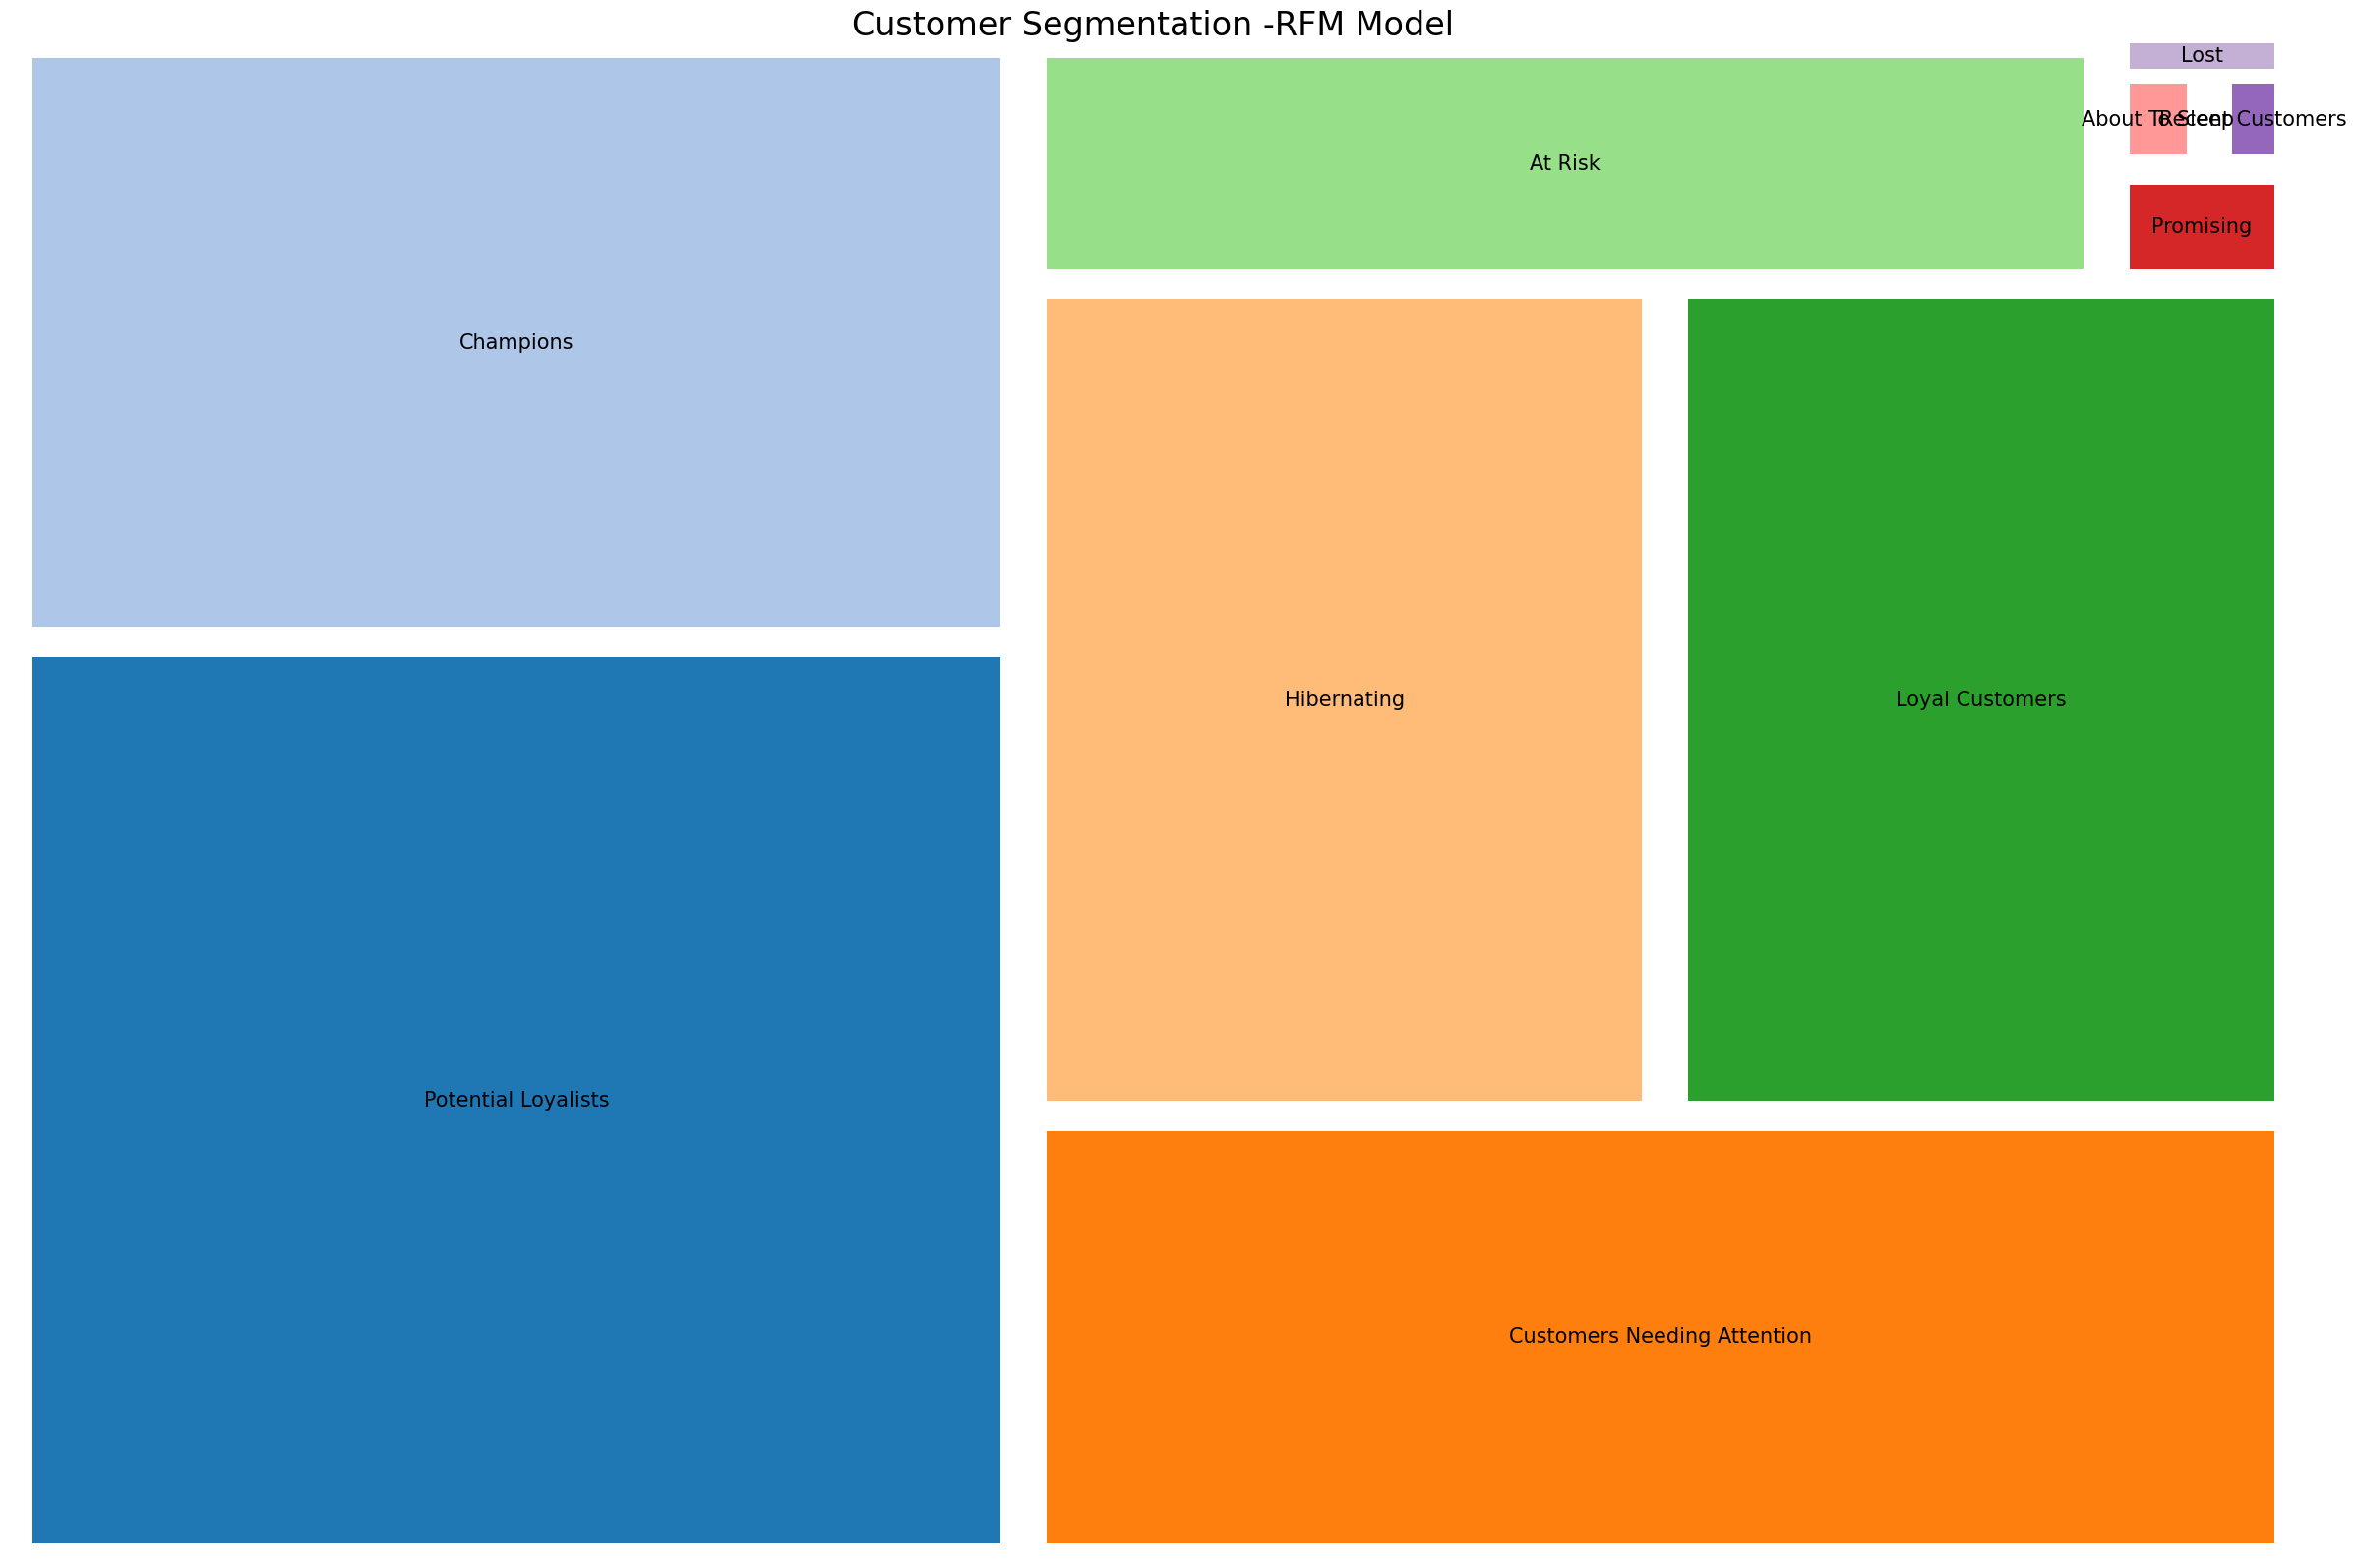

In [ ]:
plt.figure(figsize=(30, 20))
# we don't require the axis values so lets remove it
plt.axis("off")
axis = squarify.plot(final_rfm['customer_category'].value_counts(),
                     label=final_rfm['customer_category'].value_counts().index,
                     color=sb.color_palette("tab20", len(
                         final_rfm['customer_category'].value_counts())),
                     pad=1,
                     text_kwargs={'fontsize': 15})
axis.set_title("Customer Segmentation -RFM Model", fontsize=24)

In [ ]:
final_rfm.to_csv("final_segmentation.csv")

# **RECOMMENDATIONS**

In [ ]:
def marketing_actions(row):
  if row['customer_category']=='Champions':
    return "Offer exclusive deals and first hand information of new food items added in menu. Share testimonials of these customers over social media. Will promote your brand"
  elif row['customer_category']=='Loyal Customers':
    return "Upsell high ticket size food items and seek reviews"
  elif row['customer_category']=='Potential Loyalists':
    return "Provide incentives to join your loyalty program and Send personalized food recommendations based on their past orders"
  elif row['customer_category']=='Recent Customers':
    return "Send a welcome email with a discount on their next order & introduce them to your best-selling food items"
  elif row['customer_category']=='Promising ':
    return "Share stories about your brand and the quality of your food & Offer trial discounts"
  elif row['customer_category']=="Customers Needing Attention":
    return "Send time-sensitive discounts to encourage immediate action & recommend products based on their past orders"
  elif row['customer_category']=="About To Sleep":
    return "Highlight popular menu items and limited-time offers and provide special discounts to re-engage them"
  elif row['customer_category']=="At Risk":
    return "Send personalized emails addressing their preferences and previous orders"
  elif row['customer_category']=="Cannot loose them":
    return "Introduce them to new menu items or seasonal specials & engage them through personalized messages and exclusive offers"
  elif row['customer_category']=="Hibernating":
    return "Offer relevant products that align with thier past preferences and special discounts"
  elif row['customer_category']=="Lost":
    return "Revive interest with reach out campaign,ignore otherwise"







final_rfm['Recommendations']=final_rfm.apply(marketing_actions,axis=1)


In [ ]:
final_rfm.to_csv("recommendation_rfm.csv")